In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Anomaly detection using isolation forest

In [2]:
df = pd.read_csv('healthcare (1).csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


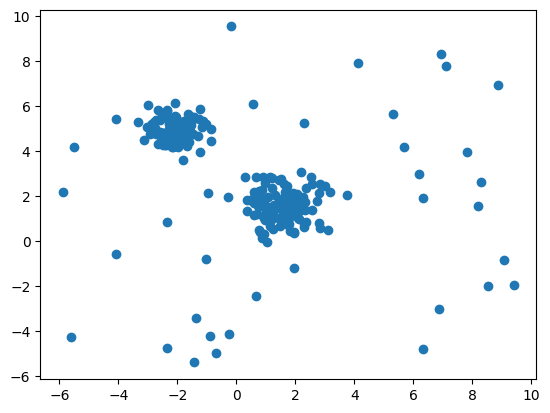

In [3]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [4]:
from sklearn.ensemble import IsolationForest
out = IsolationForest(contamination=0.2)
out.fit(df)

IsolationForest(contamination=0.2)

In [6]:
pred = out.predict(df)
pred # -1 is outliers and 1 is normal data points

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [7]:
index = np.where(pred<0)
index # all the outliers

(array([  4,  20,  24,  31,  45,  48,  49,  52,  53,  55,  60,  61,  63,
         67,  72,  74,  78,  83,  85,  87,  92,  97, 104, 108, 114, 119,
        126, 130, 132, 133, 141, 151, 160, 167, 177, 179, 182, 187, 197,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [9]:
x= df.values
x

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

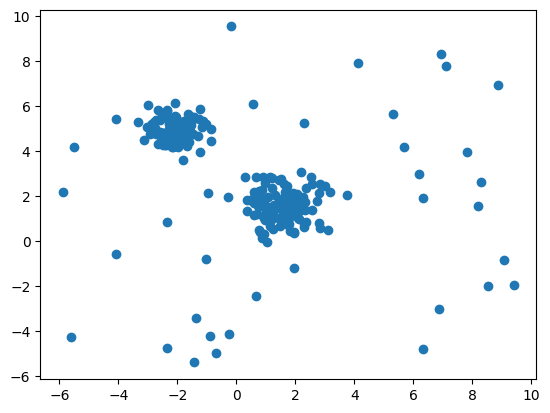

In [10]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

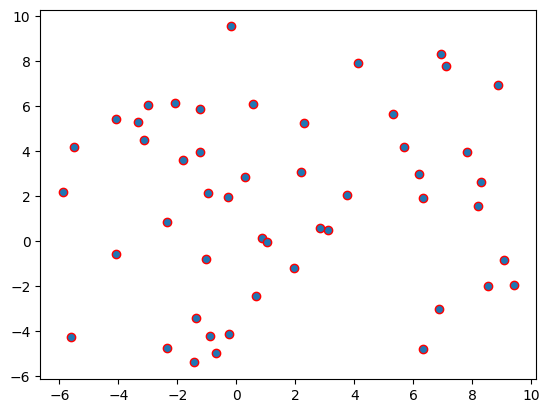

In [12]:
plt.scatter(x[index,0], x[index,1], edgecolors='r') # all the outliers in df

Anomaly Detection using DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

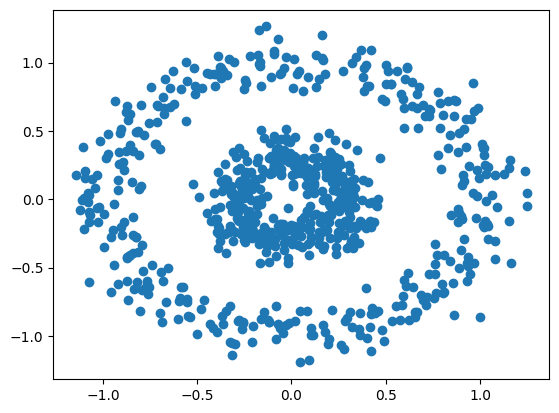

In [15]:
plt.scatter(x[:,0], x[:,1])

In [16]:
dbscan = DBSCAN(eps=0.1)
dbscan.fit_predict(x)
dbscan.labels_

array([ 0,  0, 11,  0,  2,  0, -1,  0,  3, -1,  0,  1,  8,  0, -1,  0,  0,
        0,  0,  0,  2,  3, 13,  0, 10,  0,  3,  0,  4,  5,  0, -1,  6,  0,
        0,  0, 14,  7,  0,  8,  3,  0,  0,  9,  0,  0, -1,  0, 10,  0,  0,
       11, 10, 11, 15,  0, 10,  0,  0,  0,  4,  0,  0,  0,  1, 12,  3,  0,
       10,  4,  0,  3,  8,  5,  0,  6,  0,  3,  0,  9,  3,  0,  0,  0,  4,
       12,  0,  0,  0,  0,  0,  1,  3,  0,  0,  0,  1,  0, 11,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  7,  0,  4,  7,  3,  0,  7, 13,  1, 10,
        0,  7,  0, -1, -1, 12,  7,  7,  0,  7,  0, -1, 14,  3,  4,  0, 14,
        0,  0,  0,  0,  0,  6,  0,  0,  0,  0, -1, 13, 10, 10,  7,  7,  4,
        0,  4,  4,  4,  0, 10, 10, 10, 11,  7,  0, 14,  4,  0,  9, -1,  4,
       -1,  1,  0,  3,  0,  0, 12, 13,  0,  0,  0,  0, 10,  7,  0, 13,  8,
       10, -1, 10,  7,  0, 14,  1,  0, 10,  0,  7, 12,  0, 13,  0,  0,  7,
       11,  0,  0,  0,  3,  0,  0,  3,  0,  0, 13,  0,  0,  3,  0, 11, 13,
        8,  0,  0,  0,  8

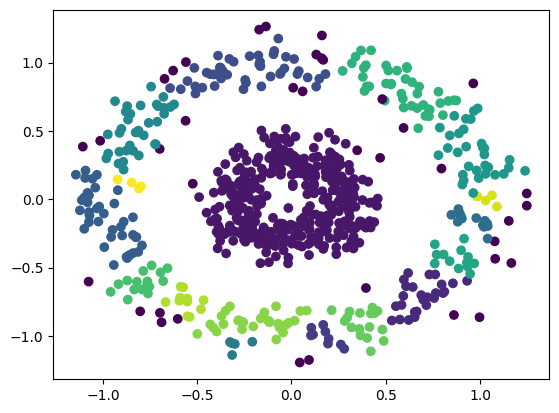

In [17]:
plt.scatter(x[:,0], x[:,1], c=dbscan.labels_) # dark ones are outliers

Anomaly detection using Local Outlier Factor

In [18]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=300, noise=0.1)

In [19]:
x, y

(array([[ 9.16002950e-01,  1.49081730e-01],
        [ 1.92061180e+00,  9.56645022e-02],
        [ 3.87123917e-01, -3.70097231e-01],
        [ 1.55796907e+00, -3.96937558e-01],
        [ 1.71725061e+00,  2.68820956e-01],
        [ 3.13545728e-01, -5.15009444e-01],
        [-5.76431088e-01,  9.17893866e-01],
        [ 1.77084491e+00,  8.00272769e-02],
        [-8.52081321e-01,  4.51119450e-01],
        [ 8.87539752e-01,  6.08306457e-01],
        [ 4.11082928e-01, -1.95253728e-01],
        [ 3.13029980e-01, -2.18055828e-01],
        [-4.58222517e-01,  8.15693085e-01],
        [ 1.75367616e+00, -1.01725267e-01],
        [-7.52980175e-01,  6.90713024e-01],
        [-8.22820170e-01,  4.02883620e-01],
        [ 1.31312816e+00, -4.78164902e-01],
        [-8.13218677e-01,  4.57473734e-01],
        [-2.08297310e-01,  9.75883273e-01],
        [-9.62208532e-01,  3.61341492e-01],
        [-2.86903364e-01,  9.28729838e-01],
        [-9.30628558e-01,  1.91520652e-01],
        [-6.33171189e-01,  8.023

In [21]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(x)

In [23]:
y_pred # -1 are outliers

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [28]:
# Separate normal data points>> inliners and outliers
x_inliners = x[y_pred == 1]
x_outliers = x[y_pred == -1]

In [29]:
x_inliners

array([[ 9.16002950e-01,  1.49081730e-01],
       [ 1.92061180e+00,  9.56645022e-02],
       [ 3.87123917e-01, -3.70097231e-01],
       [ 1.55796907e+00, -3.96937558e-01],
       [ 1.71725061e+00,  2.68820956e-01],
       [-5.76431088e-01,  9.17893866e-01],
       [ 1.77084491e+00,  8.00272769e-02],
       [-8.52081321e-01,  4.51119450e-01],
       [ 8.87539752e-01,  6.08306457e-01],
       [ 4.11082928e-01, -1.95253728e-01],
       [ 3.13029980e-01, -2.18055828e-01],
       [-4.58222517e-01,  8.15693085e-01],
       [ 1.75367616e+00, -1.01725267e-01],
       [-7.52980175e-01,  6.90713024e-01],
       [-8.22820170e-01,  4.02883620e-01],
       [ 1.31312816e+00, -4.78164902e-01],
       [-8.13218677e-01,  4.57473734e-01],
       [-2.08297310e-01,  9.75883273e-01],
       [-9.62208532e-01,  3.61341492e-01],
       [-2.86903364e-01,  9.28729838e-01],
       [-6.33171189e-01,  8.02390398e-01],
       [-1.42107669e-01,  9.70261521e-01],
       [ 1.76408338e+00, -1.08798408e-01],
       [ 1.

In [30]:
x_outliers

array([[ 3.13545728e-01, -5.15009444e-01],
       [-9.30628558e-01,  1.91520652e-01],
       [ 1.11474410e+00,  9.53533419e-02],
       [-7.60385656e-01,  8.43071203e-02],
       [-7.62539694e-04,  5.99723443e-01],
       [-2.06768945e-01,  1.22118124e+00],
       [ 1.41803384e-01, -3.94415954e-01],
       [-6.46768825e-02,  5.20483053e-01],
       [ 2.19588099e+00,  3.36100821e-01],
       [ 9.33799098e-01, -1.11782436e-01],
       [ 2.04391095e+00,  5.46679872e-01],
       [-1.09626680e+00,  8.04867996e-03],
       [-8.41892492e-01, -2.92635897e-02],
       [-9.79656549e-01,  7.51568508e-02],
       [-9.05128400e-02, -1.36813655e-01],
       [-1.01963467e+00,  1.67820934e-01],
       [-3.79943657e-02, -1.78275635e-01],
       [-5.04263158e-02,  4.86694700e-01],
       [ 1.13073936e+00, -2.30398208e-02],
       [ 1.17305486e+00,  7.27534153e-01],
       [-9.99343143e-01,  1.26541378e-01],
       [-1.12558795e+00,  3.80582390e-01],
       [ 1.34222957e+00, -7.07838927e-01],
       [-1.

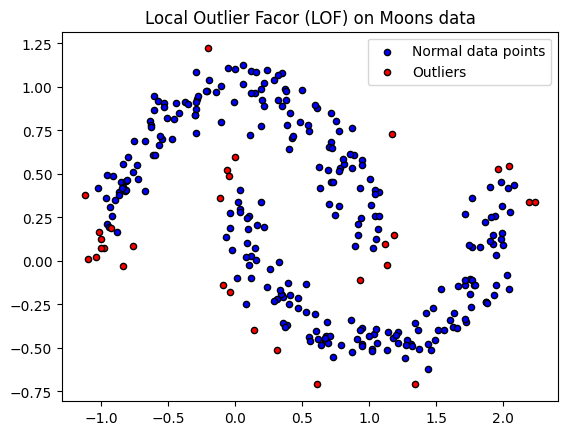

In [34]:
#Plotting
plt.title("Local Outlier Facor (LOF) on Moons data")
plt.scatter(x_inliners[:,0],x_inliners[:,1], c='b', s=20, edgecolors='k', label="Normal data points")
plt.scatter(x_outliers[:,0], x_outliers[:,1], c='r', s=20, edgecolors='k', label='Outliers')
plt.legend()
plt.show()